# **Import Dependencies**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# **Data Collection and Pre-processing**

In [2]:

from google.colab import files
uploaded = files.upload()

Saving car_data.csv to car_data.csv


In [3]:

#dataset is now stored in a Pandas Dataframe
import io
car_data=pd.read_csv(io.BytesIO(uploaded['car_data.csv']))

In [4]:
#printing the data
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
#printing the data of top 5 rows
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#printing the data of bottom 5 rows
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [9]:
#cheak the shape of the data set
car_data.shape

(301, 9)

In [10]:
#cheak the infomation of the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
#cheak the statistik measure of the dataset
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
#cheak the missing values of the dataset
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
#cheak the value of Fuel_type
car_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [14]:
#cheak the value of Seller_Type
car_data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [15]:
#cheak the value of Transmission
car_data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [17]:
#Encoding the categorical (data change the values in number)
print(car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True))

print(car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True))

print(car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True))

None
None
None


In [18]:
car_data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [19]:
#Splitting the data in to training data and test data
X=car_data.drop(['Car_Name','Selling_Price'], axis=1)
Y=car_data['Selling_Price']

In [20]:
#print the drop the X and Y
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

# **Splitting Training and Test Data**

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2, test_size=0.2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (240, 7) (61, 7)


# **Model Training with Linear Regression**

In [23]:
lin_model=LinearRegression()

In [24]:
#fitting the model
lin_model.fit(X_train,Y_train)

LinearRegression()

# **Model Evaluation : Linear Regression**

In [25]:
#predictio on training data
X_training_prediction=lin_model.predict(X_train)

In [26]:
#R squared Error
error_score= metrics.r2_score(X_training_prediction,Y_train)

In [27]:
 print('R Squared Error: ',error_score)

R Squared Error:  0.8685439505823428


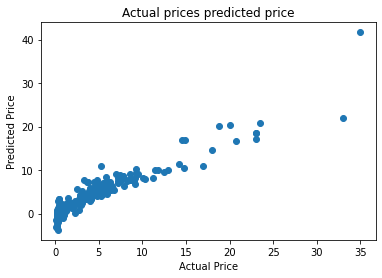

In [28]:
#Visualize the actual price and predicted prices
plt.scatter(Y_train,X_training_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices predicted price")
plt.show()

In [29]:
#predictio on test data
X_test_prediction=lin_model.predict(X_test)

In [30]:
#R squared Error
error_score= metrics.r2_score(X_test_prediction,Y_test)

In [31]:
print('R Squared Error: ',error_score)

R Squared Error:  0.8193296211105912


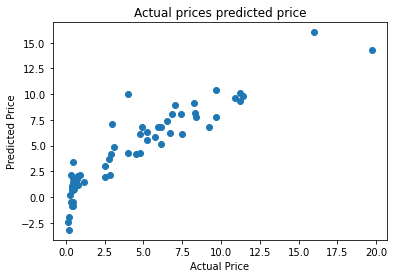

In [32]:
#Visualize the actual price and predicted prices
plt.scatter(Y_test,X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices predicted price")
plt.show()

# **Model Train**

In [33]:
#loading the lasso Regression
less_reg_model=Lasso()

In [34]:
#fitting the model
less_reg_model.fit(X_train,Y_train)

Lasso()

# **Model Evaluation with LASSO prediction on training data**

In [35]:
training_data_prediction=less_reg_model.predict(X_train)

In [36]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)

In [37]:
print("R Squared error: ",error_score)

R Squared error:  0.843587395258283


In [38]:
#prediction on test data
test_data_prediction=less_reg_model.predict(X_test)

In [39]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [40]:
print("R Squared error: ",error_score)

R Squared error:  0.8497457570738539
